# Price Normalization

The following features have been introduced to the dataset:

1. **price_mean** (price mean from 18 rooms on first content page)
2. **price_std** (price standar deviation from 18 rooms on first content page)
3. **price_centered_mu** (this mean is what airbnb actually gave us, I think of it as the real mu, not the mean)
4. **price_centered_mean** (price - price_mean, where price_mean is described on the 1st point)
5. **price_normalized** (price_centered_mu / price_std, which are defined on 2nd and 3th points)
6. **context_skew** (this is the histogram skewness, **x axis is scaled (discuss on next meeting)**)
8. **context_kurtosis** (similar to context_skew)

Going beyond pure statistic metrics:


In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
# Set some Pandas options
pd.set_option('display.notebook_repr_html', False);
pd.set_option('display.max_columns', 20);
pd.set_option('display.max_rows', 25);
#Setting path to read Chicago Datasets

path = "/home/raul/airbnb2/"
world = pd.read_csv(path+'datasets/world_v1.4.csv', sep="\t",header=0, na_values="NaNxxxx", low_memory=False)

city_labels= ["NYC", "SFO", "LAX", "CHI", "BOS"]
context_f = ["context_mean","context_min", "context_max", "context_histogram", "context_number_of_rooms",
             "context_names", "context_prices", "context_ratings", "context_number_of_reviews", 
             "context_room_type", "context_room_id", "context_host_id", "context_instant_booking", 
             "context_super_hosts", "price_mean","price_std","price_centered_mu","price_centered_mean",
             "price_normalized","context_skew","context_kurtosis"]

# price_centered_mu and price_centered_mean

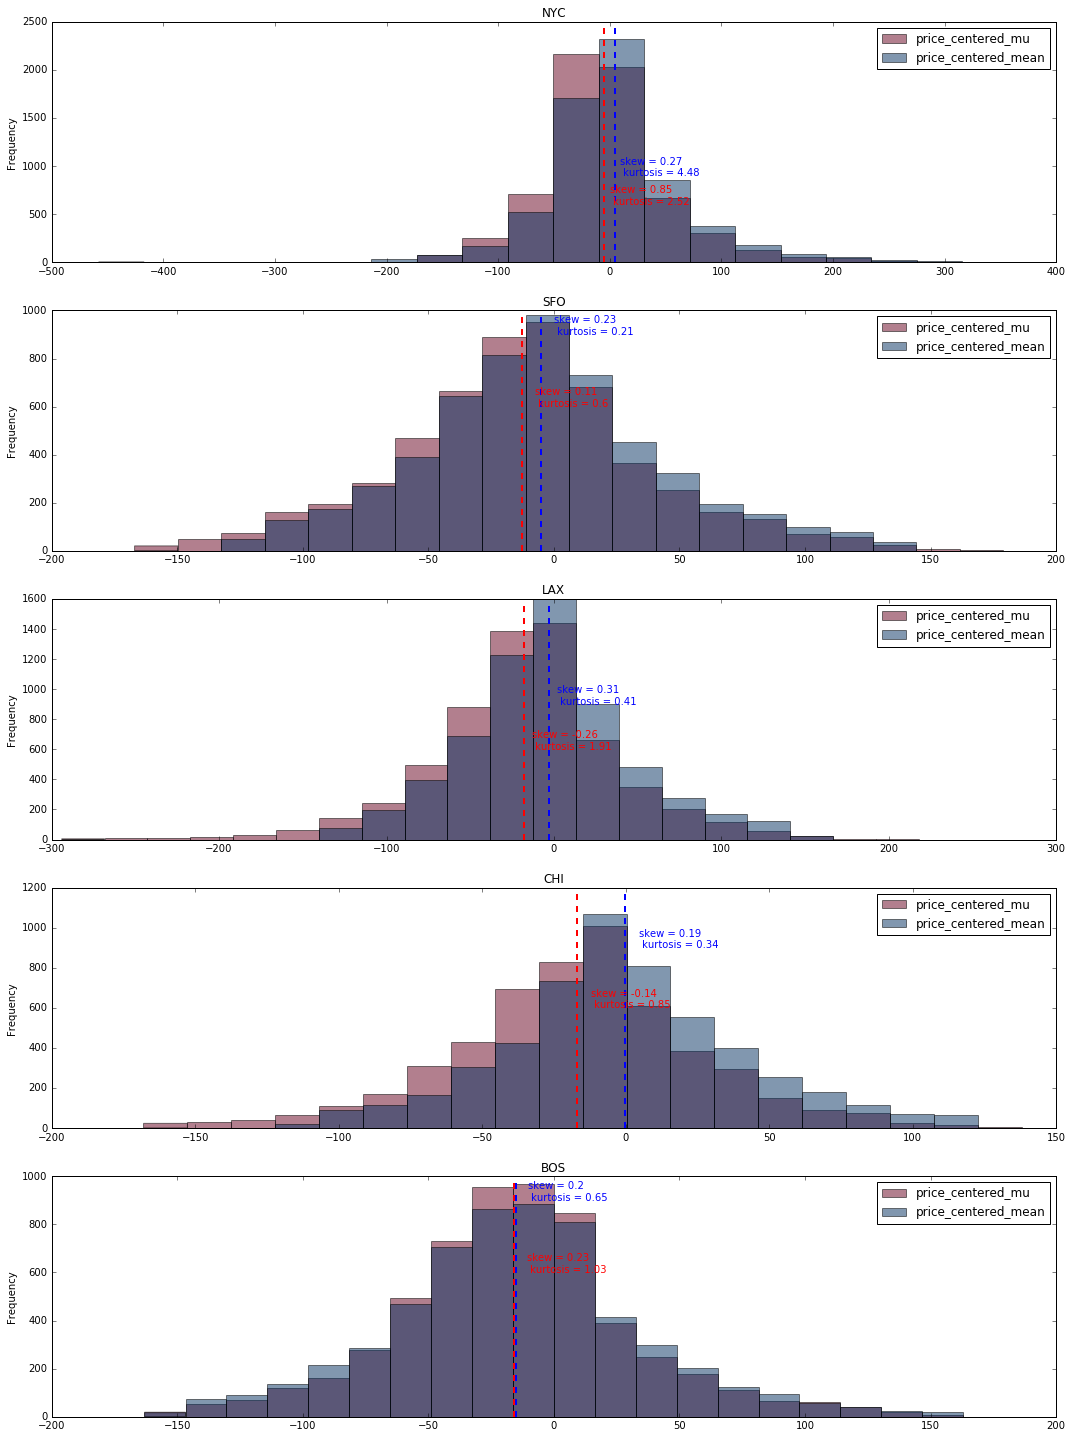

In [109]:
fig, axs = plt.subplots(5,1)

i=0
features = ["price_centered_mu", "price_centered_mean"]
std_tolerance = 2
for c in city_labels:
    #c = city_labels[0]
    city = world[world.city==c]
    city = city[city.price < city.price.std()]
    city = city[city.price_centered_mu < (city.price_centered_mu.std()*std_tolerance)]
    city = city[city.price_centered_mu > (-city.price_centered_mu.std()*std_tolerance)]
    
    city = city[city.price_centered_mean < (city.price_centered_mean.std()*std_tolerance)]
    city = city[city.price_centered_mean > (-city.price_centered_mean.std()*std_tolerance)]
    
    city = city[city.price_normalized <  (city.price_normalized.std()*std_tolerance)]
    city = city[city.price_normalized > (-city.price_normalized.std()*std_tolerance) ]
    means = city[features].mean()

    my_plot = city[features].plot(kind="hist",alpha=0.5,colormap="RdBu", ax=axs[i], bins=20, title=c)
    my_plot.axvline(means[0], color='r', linestyle='dashed', linewidth=2)
    my_plot.axvline(means[1], color='b', linestyle='dashed', linewidth=2)
    
    skew_1 = round(stats.skew(city[features[0]].values),2)
    kurtosis_1 = round(stats.kurtosis(city[features[0]].values),2)
    
    skew_2 = round(stats.skew(city[features[1]].values),2)
    kurtosis_2 = round(stats.kurtosis(city[features[1]].values),2)
    
    my_plot.text(means[0]+5,600, "skew = "+str(skew_1)+ "\n kurtosis = "+str(kurtosis_1), color="r")
    my_plot.text(means[1]+5,900, "skew = "+str(skew_2)+ "\n kurtosis = "+str(kurtosis_2), color="b")
    i+=1
    
fig.set_size_inches(18, 25)

# context_skew and context_kurtosis

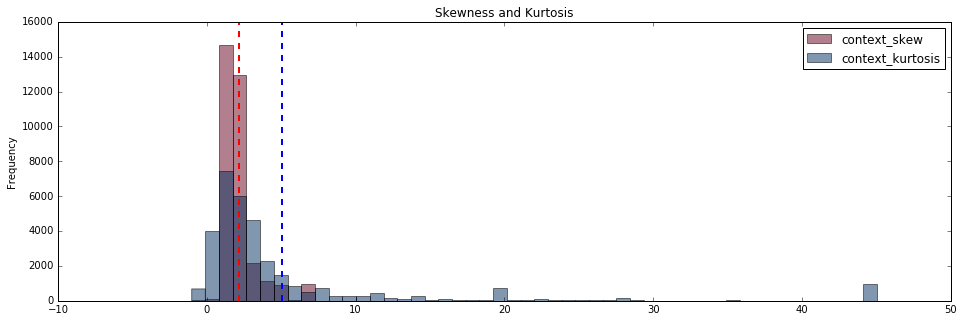

In [10]:
features = ["context_skew","context_kurtosis"]

city = world
means = city[features].mean()
my_plot = city[features].plot(kind="hist",alpha=0.5,colormap="RdBu", bins=50, 
                              title="Skewness and Kurtosis", figsize=(16,5));
my_plot.axvline(means[0], color='r', linestyle='dashed', linewidth=2);
my_plot.axvline(means[1], color='b', linestyle='dashed', linewidth=2);

# Next Features to Add

## Perceived Value (PV) & Perceived Risk (PR) & Perceived Authenticity (PA) 
Those are features that we will exploit on our classifier as our proposal to the paper
CLASSIFIER LOGISTIC REGRESSION
### Perceived Value (PV):
We could compute a linear regression on guest's history to learn a model: $price = \beta_0+\beta_1*x_1+... $

Then we could compute prices: $\hat p $ using that model for the list of rooms to rank on the test cases.

Then doing the difference between $price_value = \hat p - real_price$, claiming that this is a way to model perceived value.

### Perceived Risk (PR)
min_host_number_of_reviews in guest history or just number_of_reviews

### Perceived Authenticity (PA)
How do I know if rooms offer a true living experience (home experience)???
### Price Sensitivity (PS)
price - hotel_mean_price
or we could also combine airbnb_mu

## Electronic Word of Mouth (eWoM) 
Output of a classifier that uses rooms representation with text reviews

## Context Turistic Venues
Foursquare data to calculate distances and use them on a Classifier